# Gradient Descent
## Instructions:
* Go through the notebook and complete the tasks. 
* Make sure you understand the examples given. If you need help, refer to the Essential readings or the documentation link provided, or go to the discussion forum. 
* Save your notebooks when you are done.

This notebook will give you the chance to implement the gradient descent algorithm to solve a linear regression problem. 

The main steps involved will be:

    Within a loop -
    1. Calculate the hypothesis h 
    2. Calculate the loss 
    3. Calculate the gradient descent update 
    4. stop loop when loss falls stops changing


**Task 1:**

The first task is to load the diabetes dataset (from notebook 3.2), select one feature (bmi, the 2nd indexed feature), and split it into a training set (90%) and a test set (10%). Plot the data as a scatter plot.


Intercept (theta 0): 
 152.81627065184932
Coefficients (theta 1): 
 [950.32377868]
Mean squared error: 3943.68


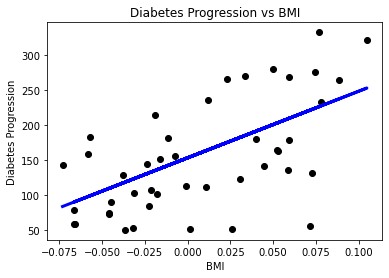

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Extract the bmi feature (index 2)
X_diabetes = diabetes.data[:, np.newaxis, 2]

# Select 10% for testing, 90% for training
data_len = len(diabetes.target)
nTestSamples = int(0.1 * data_len)
idx = np.arange(data_len)
np.random.shuffle(idx)  # Shuffle the indices

idx_test = idx[:nTestSamples]
idx_train = idx[nTestSamples:]

X_test = X_diabetes[idx_test]
X_train = X_diabetes[idx_train]
y_test = diabetes.target[idx_test]
y_train = diabetes.target[idx_train]

# Create a linear regression object for comparison
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Intercept (theta 0): \n', regr.intercept_)
print('Coefficients (theta 1): \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Diabetes Progression vs BMI")
plt.show()


**Task 2:**

Write a suitable hypothesis function, ```h_lin```, that can handle an single feature vector and a corresponding 2D parameter (theta)


In [2]:
def h_lin(X, theta):
    'X should be a data vector, theta the parameters'
    return theta[0] + theta[1] * X.flatten()  # Ensure X is 1D



**Task 3:**

Write a suitable loss function, ```loss_L2```, that calculates the least-squares loss between a given hypothesis and the target value.


In [3]:
def loss_L2(h, y):
    'Calculate the least-squares loss.' 
    'h is a vector of predictions by the hypothesis function, y is the target'
    return np.mean((h - y) ** 2)


**Task 4:**

Write a suitable function to calculate the gradients, ```gradient_batch```, that operates on both the parameters, ```theta[0]``` (the intercept) and ```theta[1]``` (the gradient coefficient). The function is given the data X, and the target, y. 
(Remember the difference in gradient calculationn for the intercept term.)

In [4]:
def gradient_batch(theta, X, y):
    'Calculate the gradients of the loss function for the parameters in theta'
    'Given data X and target y'
    
    m = len(y)  # Number of samples
    h = h_lin(X, theta)
    
    # Gradient calculation
    grad = np.array([
        (1/m) * np.sum(h - y),  # Gradient for theta[0] (intercept)
        (1/m) * np.sum((h - y) * X.flatten())  # Gradient for theta[1] (slope)
    ])
    
    return grad

    

**Task 5:**

Write the batch gradient descent algorithm that iteratively updates the coefficients (an initially selected set of theta values), and stops once the loss function stops changing much (i.e. by about 0.1) 


In [5]:
def batch_gd(X, y, old_theta, alpha, loss_stop_threshold):
    'Batch gradient descent training for linear function with a single variable'
    theta = old_theta.copy()
    
    # Initial loss value
    loss = loss_L2(h_lin(X, theta), y)
    
    while True:
        # Calculate gradients
        grad = gradient_batch(theta, X, y)
        
        # Update theta
        theta -= alpha * grad
        
        # Calculate new loss
        new_loss = loss_L2(h_lin(X, theta), y)
        
        # Check for convergence
        if abs(new_loss - loss) < loss_stop_threshold:
            break
        
        loss = new_loss

    print('GD stopped at loss %s, with coefficients: %s' % (loss, theta))
    return theta



**Task 6:**

Train your algorithm using the training data, then test it using the test set. Compare the performance of your algorithm to the sklearn solution. Have a play with some of the parameters you can tweak, particularly learning rate and stopping criterion.



GD stopped at loss 3929.807543245161, with coefficients: [152.70207487 808.9688132 ]
Intercept (theta 0): 
 152.70207487449449
Coefficients (theta 1): 
 808.9688132047643
Mean squared error: 3987.09


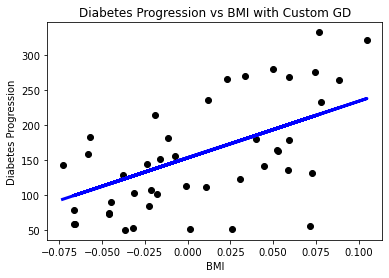

In [6]:
# Set initial theta values
theta = [100, 2]

# Set stopping criterion
loss_stop_threshold = 0.1

# Learning rate
alpha = 0.5

# Train the model using batch gradient descent
theta = batch_gd(X_train, y_train, theta, alpha, loss_stop_threshold)

# Predictions using the trained model
y_pred = h_lin(X_test, theta)

# The coefficients
print('Intercept (theta 0): \n', theta[0])
print('Coefficients (theta 1): \n', theta[1])

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# Plot outputs using test data
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel("BMI")
plt.ylabel("Diabetes Progression")
plt.title("Diabetes Progression vs BMI with Custom GD")
plt.show()

